In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [33]:
df_1 = pd.read_csv('series1.csv',dtype=float,header=None)
df_2 = pd.read_csv('series2.csv',dtype=float,header=None)
series1 = df_1.values
series2 = df_2.values

df_competitor1 = pd.read_csv('competitor1.csv',dtype=float,header=None)
df_competitor2 = pd.read_csv('competitor2.csv',dtype=float,header=None)
competitor1 = df_competitor1.values
competitor2 = df_competitor2.values

df_competitor1_full = pd.read_csv('competitor1_full.csv',dtype=float,header=None)
df_competitor2_full = pd.read_csv('competitor2_full.csv',dtype=float,header=None)
competitor1_full = df_competitor1_full.values
competitor2_full = df_competitor2_full.values



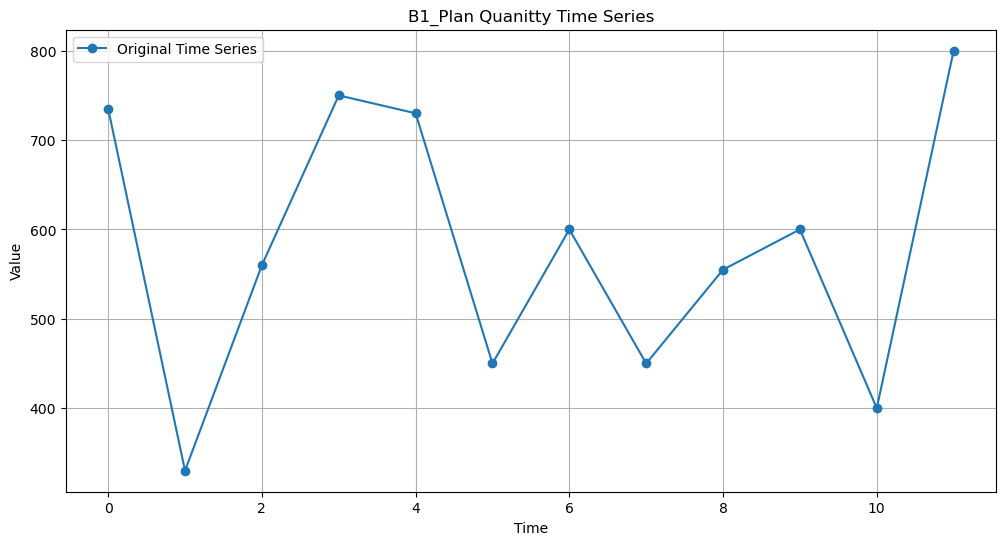

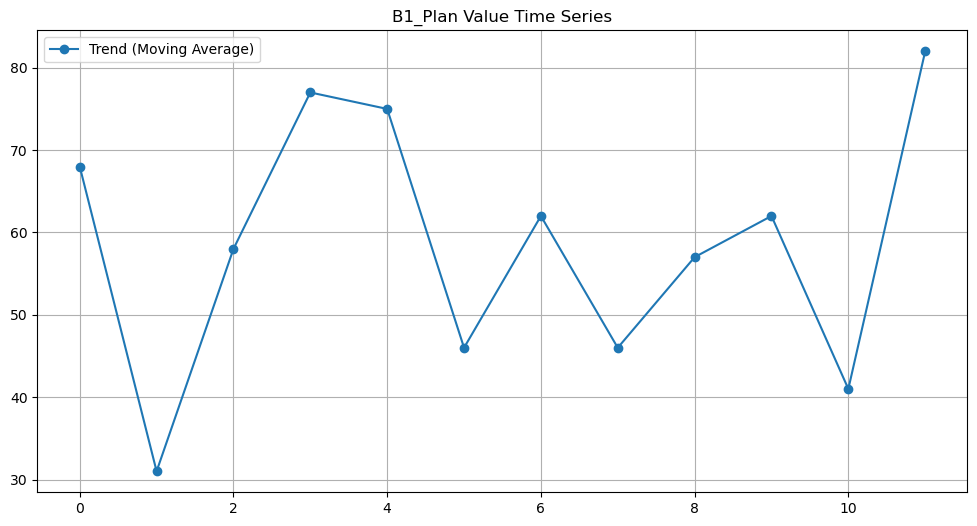

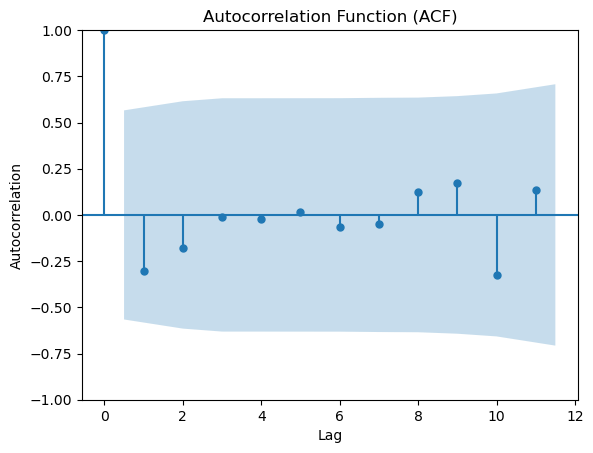

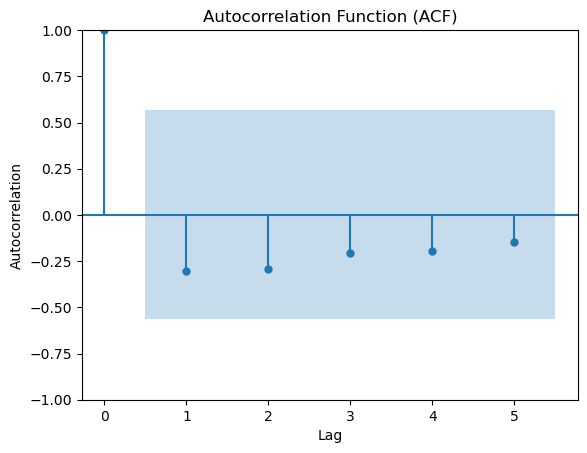

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(series1, label='Original Time Series', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('B1_Plan Quanitty Time Series')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(series2, label='Trend (Moving Average)',  marker='o')
plt.title('B1_Plan Value Time Series')
plt.legend()
plt.grid(True)
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series1, lags=11)  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(series1, lags=5)  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# Grey Model

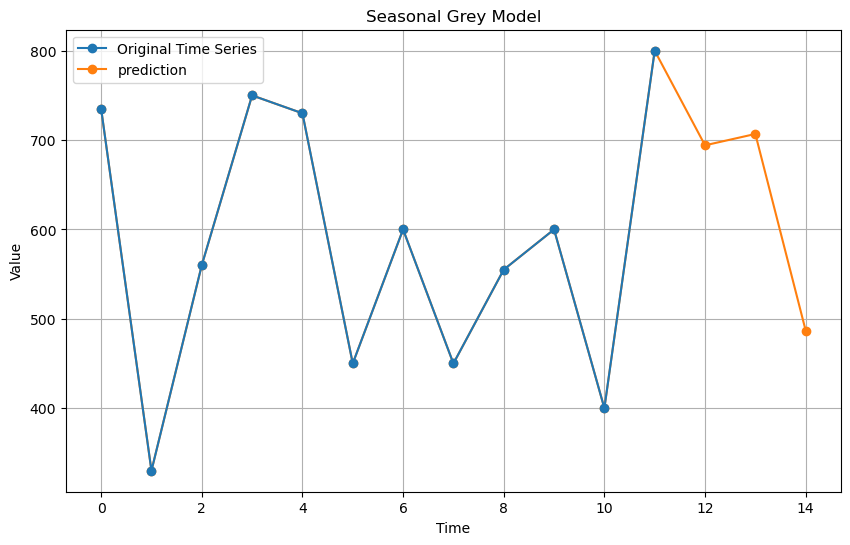

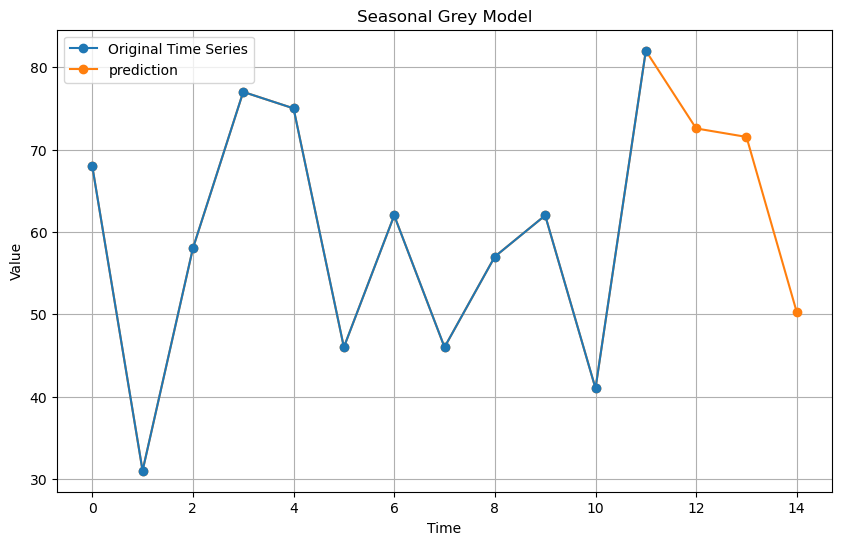

array([68.        , 31.        , 58.        , 77.        , 75.        ,
       46.        , 62.        , 46.        , 57.        , 62.        ,
       41.        , 82.        , 72.56277401, 71.53309076, 50.23527376])

In [35]:
import greypredict as gm
import statsmodels.api as sm

def calculate_metrics(true_values, forecast_values):
    mse = np.sqrt(np.mean((true_values - forecast_values) ** 2))
    mae = np.mean(np.abs(true_values - forecast_values))
    percentage_error = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100
    return mse, mae, percentage_error

def print_metrics(true_values, forecast_values):
    mse = np.sqrt(np.mean((true_values - forecast_values) ** 2))
    mae = np.mean(np.abs(true_values - forecast_values))
    percentage_error = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100
    # Print the metrics
    print("---------------------------------------------------")
    print(f'Root Mean Squared Error : {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'Mean Absolute Percentage Error : {percentage_error}%')
    print("---------------------------------------------------\n")
    return mse, mae, percentage_error 

def run_grey_model(series, forecasting_step = 1, period = 4, testing = True, draw = True):
    if testing == True:
        x0 = series[:len(series)-forecasting_step].flatten()
    else:
        x0 = series.flatten()
    model0 = gm.GreyPredictionModel.GM11(x0)
    pre0 = model0.seasonal_fit_and_predict(period, forecasting_step)

    output = np.append(x0, (pre0))

    if draw == True:
        plt.figure(figsize=(10, 6))
        plt.plot(series, label='Original Time Series', marker='o',zorder = 3)
        plt.plot(output, label='prediction', marker='o')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Seasonal Grey Model')
        plt.legend()
        plt.grid(True)
        plt.show()
    if testing == True:
        print("Grey Model Result")
        print_metrics(series[-forecasting_step:].flatten(), pre0)
    return output
run_grey_model(series1, forecasting_step=3,testing=False)
run_grey_model(series2, forecasting_step=3,testing=False)


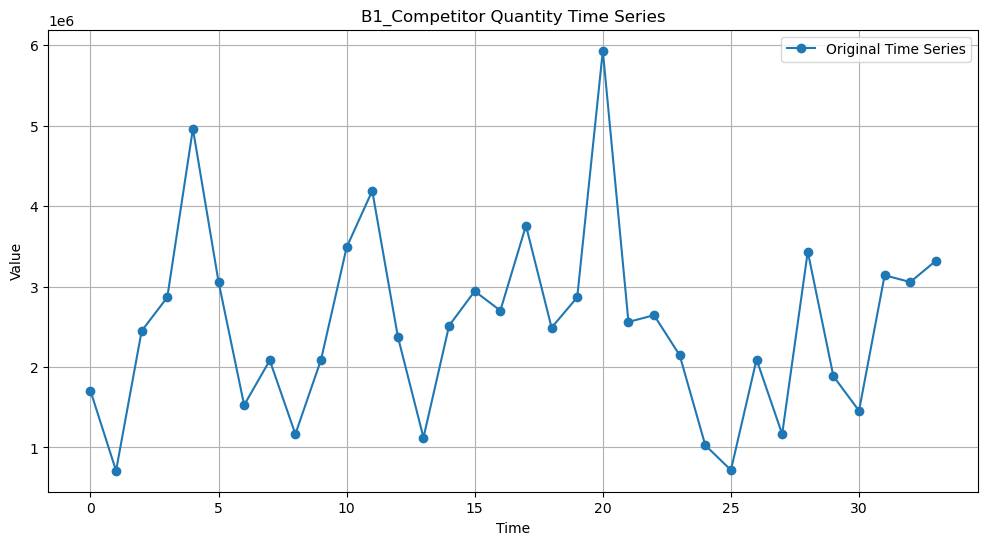

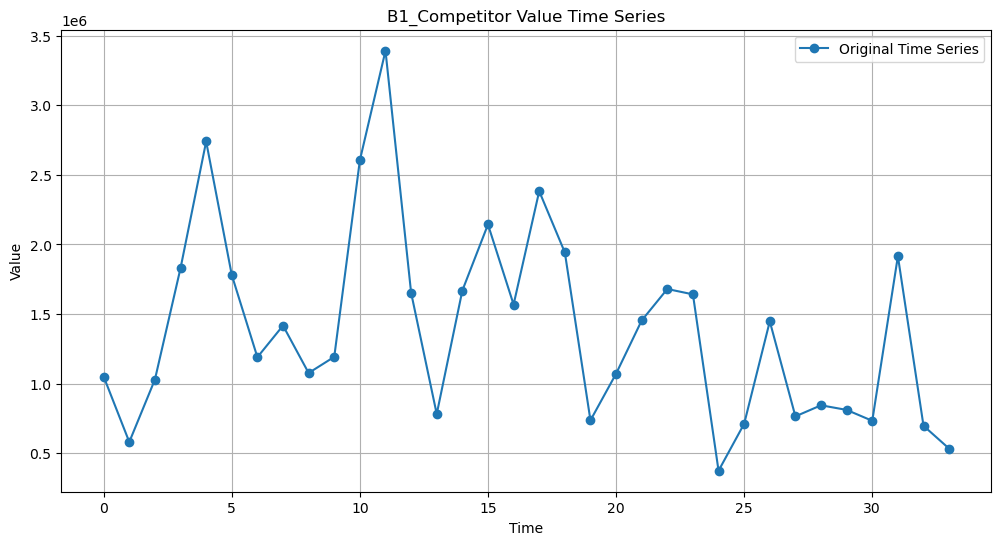

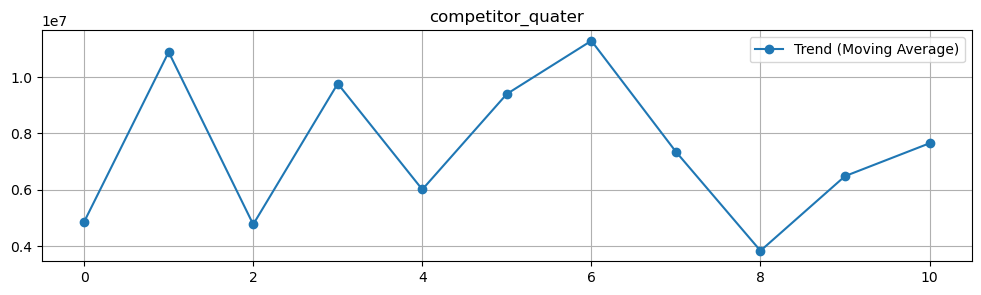

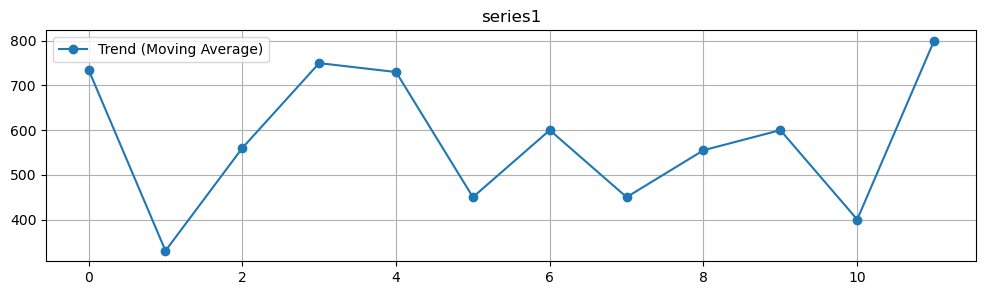

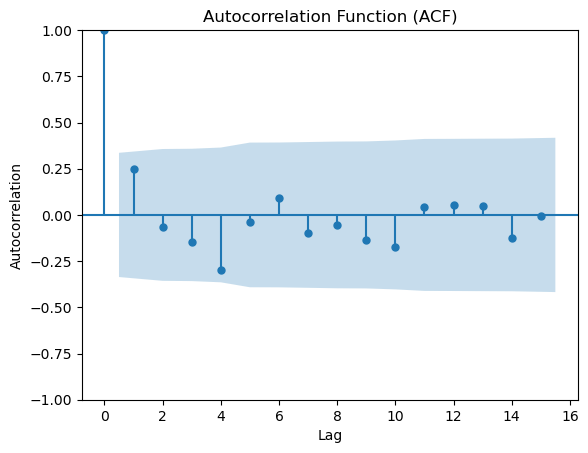

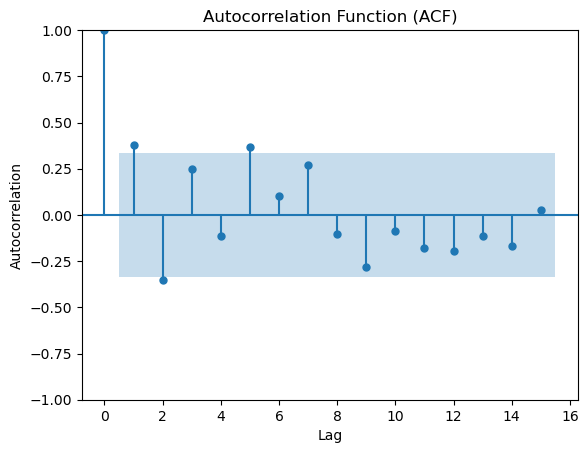

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(competitor1, label='Original Time Series', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('B1_Competitor Quantity Time Series')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(competitor2, label='Original Time Series', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('B1_Competitor Value Time Series')
plt.legend()
plt.grid(True)
plt.show()

competitor_quater = np.array([sum(competitor1[i*3:i*3+3]) for i in range(11)])  # IMPORTANT
competitor_quater_full = np.array([sum(competitor1[i*3:i*3+3]) for i in range(12)])  # IMPORTANT

plt.figure(figsize=(12, 3))
plt.plot(competitor_quater, label='Trend (Moving Average)',marker='o' )
plt.title('competitor_quater')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(series1, label='Trend (Moving Average)',marker='o' )
plt.title('series1')
plt.legend()
plt.grid(True)
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(competitor1, lags=15)  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(competitor2, lags=15)  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [38]:
competitor_quater1 = np.array([sum(competitor1[i*3:i*3+3]) for i in range(11)])
competitor_quater2 = np.array([sum(competitor2[i*3:i*3+3]) for i in range(11)])


# VAR Model

---------------------------------------------------
Root Mean Squared Error : 52.4108799605033
Mean Absolute Error : 46.05637167949391
Mean Absolute Percentage Error : 10.204168760855092%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 5.286915539811901
Mean Absolute Error : 4.621182320541857
Mean Absolute Percentage Error : 9.901383224569297%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 1271833.710221128
Mean Absolute Error : 1175046.977232111
Mean Absolute Percentage Error : 22.13778605728799%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 1020535.7336272689
Mean Absolute Error : 803947.2321402269
Mean Absolute Percentage Error : 22.466797807634425%
---------------------------------------------------



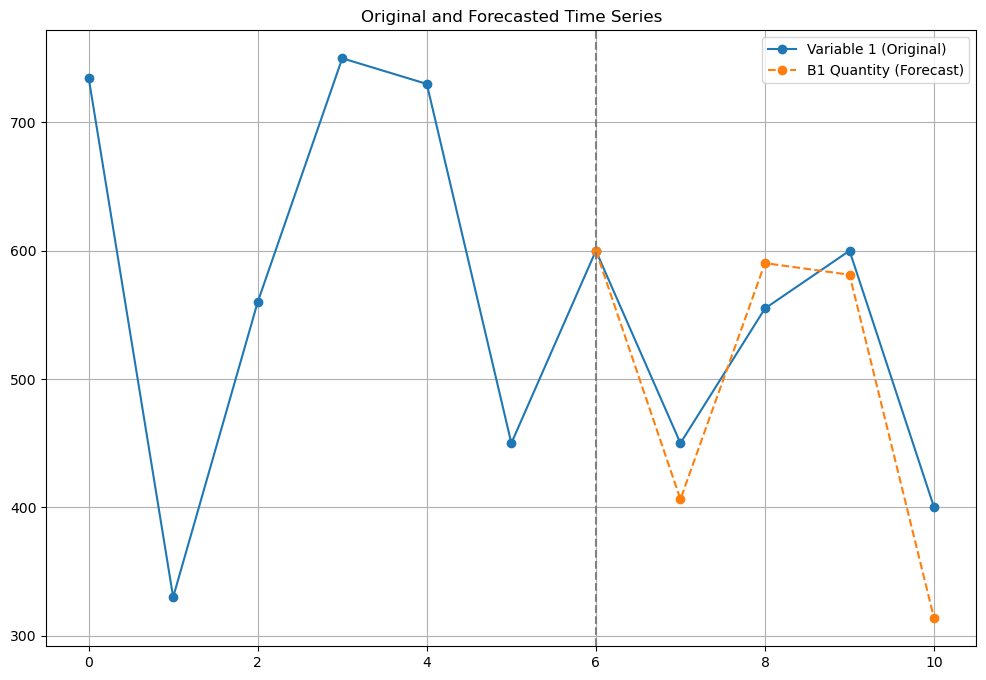

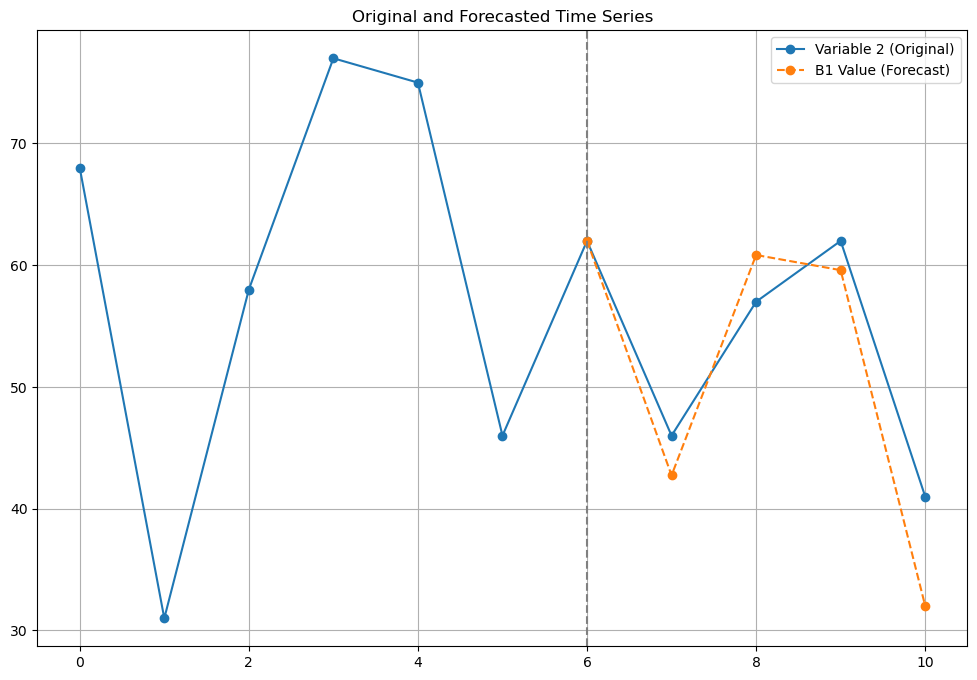

---------------------------------------------------
Root Mean Squared Error : 86.3538822366719
Mean Absolute Error : 70.787169540236
Mean Absolute Percentage Error : 15.819795341348208%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 9.088014410153534
Mean Absolute Error : 7.466771877837159
Mean Absolute Percentage Error : 16.279232769969564%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 1833704.103685777
Mean Absolute Error : 1310024.8475835847
Mean Absolute Percentage Error : 29.070367995280293%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 1319736.2756436146
Mean Absolute Error : 1279823.8644379554
Mean Absolute Percentage Error : 42.803619776316296%
---------------------------------------------------



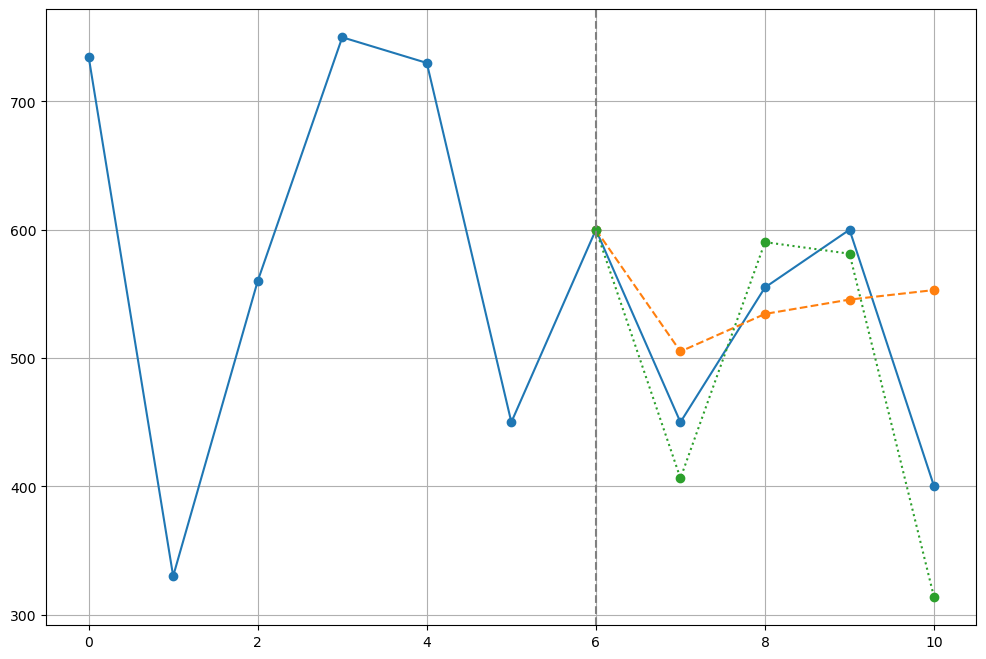

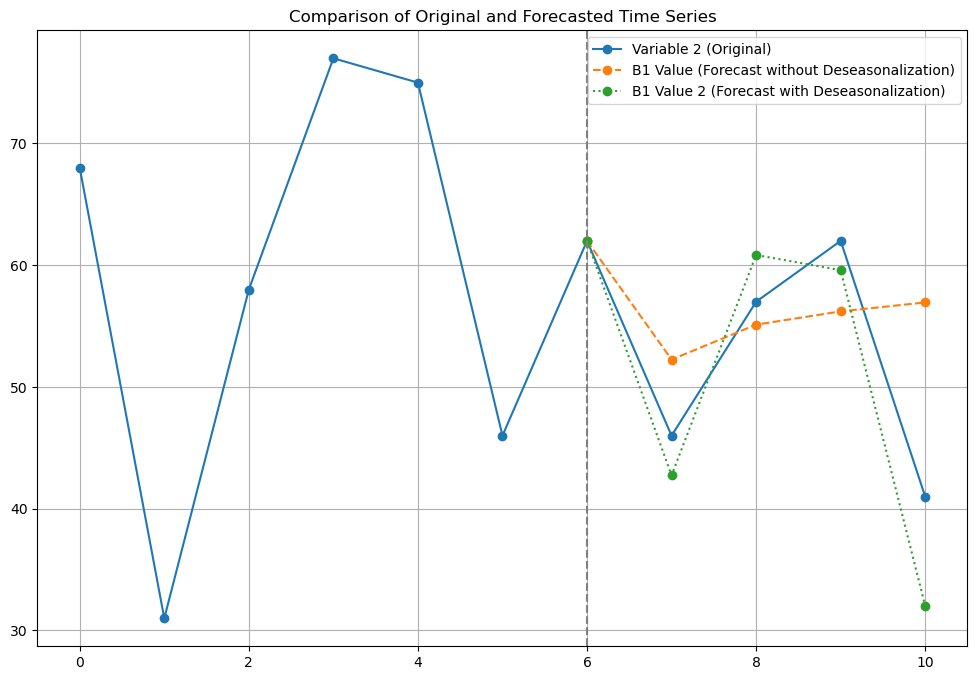

In [39]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Evaluate the performance using metrics like MSE, MAE, and Percentage Error
def calculate_metrics(true_values, forecast_values):
    mse = np.sqrt(np.mean((true_values - forecast_values) ** 2))
    mae = np.mean(np.abs(true_values - forecast_values))
    percentage_error = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100
    return mse, mae, percentage_error

def forecast_var(var_series1, var_series2, var_series3, var_series4, forecast_steps=4,Maxflag=1,Period=3):
    var1 = var_series1.flatten()# / np.max(var_series1)
    var2 = var_series2.flatten()# / np.max(var_series2)
    var3 = var_series3.flatten()# / np.max(var_series3)
    var4 = var_series4.flatten()# / np.max(var_series4)
    t = np.arange(0, len(var_series4), 1)
    
    # Step 1: Decompose the time series into trend, seasonal, and residual components
    res_var1 = sm.tsa.seasonal_decompose(var1, period=Period)
    res_var2 = sm.tsa.seasonal_decompose(var2, period=Period)
    res_var3 = sm.tsa.seasonal_decompose(var3, period=Period)
    res_var4 = sm.tsa.seasonal_decompose(var4, period=Period)

    # Deseasonalized data
    deseasonalized_var1 = var1 - res_var1.seasonal
    deseasonalized_var2 = var2 - res_var2.seasonal
    deseasonalized_var3 = var3 - res_var3.seasonal
    deseasonalized_var4 = var4 - res_var4.seasonal

    # Combine deseasonalized variables into a 2D array
    data_deseasonalized = np.column_stack((deseasonalized_var1, deseasonalized_var2, deseasonalized_var3, deseasonalized_var4))

    # Step 2: Apply VAR to the deseasonalized data
    model = sm.tsa.VAR(data_deseasonalized)
    results = model.fit(maxlags=Maxflag)  # Adjust maxlags as needed

    # Step 3: Forecast using VAR model
#     forecast_steps = 4
    forecast_deseasonalized = results.forecast(data_deseasonalized[-results.k_ar:], steps=forecast_steps)

    # Step 4: Add seasonality back to the forecast
    forecast_var1 = forecast_deseasonalized[:, 0] + res_var1.seasonal[-forecast_steps:]
    forecast_var2 = forecast_deseasonalized[:, 1] + res_var2.seasonal[-forecast_steps:]
    forecast_var3 = forecast_deseasonalized[:, 2] + res_var3.seasonal[-forecast_steps:]
    forecast_var4 = forecast_deseasonalized[:, 3] + res_var4.seasonal[-forecast_steps:]

    print_metrics(var1[-forecast_steps:], forecast_var1)
    print_metrics(var2[-forecast_steps:], forecast_var2)
    print_metrics(var3[-forecast_steps:], forecast_var3)
    print_metrics(var4[-forecast_steps:], forecast_var4)

    # Plot the original and forecasted time series for all variables
    plt.figure(figsize=(12, 8))
    plt.plot(t, var1, label='Variable 1 (Original)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var1[-forecast_steps-1], forecast_var1), label='B1 Quantity (Forecast)', linestyle='dashed',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.title('Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(12, 8))
    plt.plot(t, var2, label='Variable 2 (Original)',marker='o')
    #plt.plot(t, var3, label='Variable 3 (Original)')
    #plt.plot(t, var4, label='Variable 4 (Original)')
    plt.plot(t[-forecast_steps-1:], np.append(var2[-forecast_steps-1], forecast_var2), label='B1 Value (Forecast)', linestyle='dashed',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var3[-forecast_steps-1], forecast_var3), label='Variable 3 (Forecast)', linestyle='dashed',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var4[-forecast_steps-1], forecast_var4), label='Variable 4 (Forecast)', linestyle='dashed',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.title('Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()


    data = np.column_stack((var1, var2, var3, var4))
    # Step 2: Apply VAR to the original data (without deseasonalization)
    model_original = sm.tsa.VAR(data)
    results_original = model_original.fit(maxlags=Maxflag)  # Adjust maxlags as needed

    # Step 3: Forecast using VAR model (original data)
    forecast_original = results_original.forecast(data[-results_original.k_ar:], steps=forecast_steps)

    # Evaluate metrics for the original data
    print_metrics(var1[-forecast_steps:], forecast_original[:, 0])
    print_metrics(var2[-forecast_steps:], forecast_original[:, 1])
    print_metrics(var3[-forecast_steps:], forecast_original[:, 2])
    print_metrics(var4[-forecast_steps:], forecast_original[:, 3])


    # Plot the original and forecasted time series for comparison
    plt.figure(figsize=(12, 8))
    plt.plot(t, var1, label='Variable 1 (Original)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var1[-forecast_steps-1], forecast_original[:, 0]), linestyle='dashed', label='B1 Quantity (Forecast without Deseasonalization)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var1[-forecast_steps-1], forecast_var1), linestyle='dotted', label='B1 Quantity (Forecast with Deseasonalization)',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.grid(True)
    plt.show()
    #plt.plot(t, var3, label='Variable 3 (Original)')
    #plt.plot(t, var4, label='Variable 4 (Original)')

    plt.figure(figsize=(12, 8))
    plt.plot(t, var2, label='Variable 2 (Original)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var2[-forecast_steps-1], forecast_original[:, 1]), linestyle='dashed', label='B1 Value (Forecast without Deseasonalization)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var2[-forecast_steps-1], forecast_var2), linestyle='dotted', label='B1 Value 2 (Forecast with Deseasonalization)',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    #plt.plot(t[-forecast_steps-1:], np.append(var3[-forecast_steps-1], forecast_original[:, 2]), linestyle='dashed', label='Variable 3 (Forecast without Deseasonalization)',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var4[-forecast_steps-1], forecast_original[:, 3]), linestyle='dashed', label='Variable 4 (Forecast without Deseasonalization)',marker='o')

    #plt.plot(t[-forecast_steps-1:], np.append(var3[-forecast_steps-1], forecast_var3), linestyle='dotted', label='Variable 3 (Forecast with Deseasonalization)',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var4[-forecast_steps-1], forecast_var4), linestyle='dotted', label='Variable 4 (Forecast with Deseasonalization)',marker='o')

    plt.title('Comparison of Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

forecast_var(series1[:11], series2[:11], competitor_quater1, competitor_quater2,  forecast_steps=4,Maxflag=1,Period=5)

# Weighted Average Model

2519071.294117647
(34, 1)


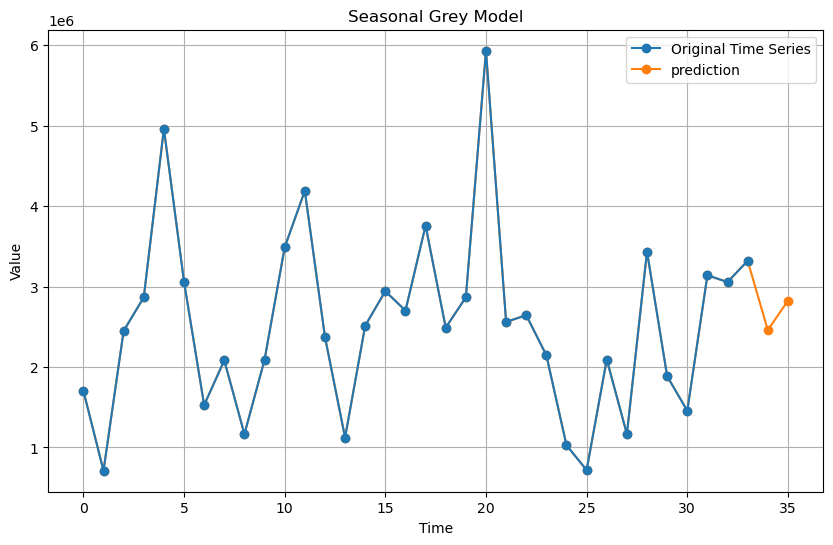

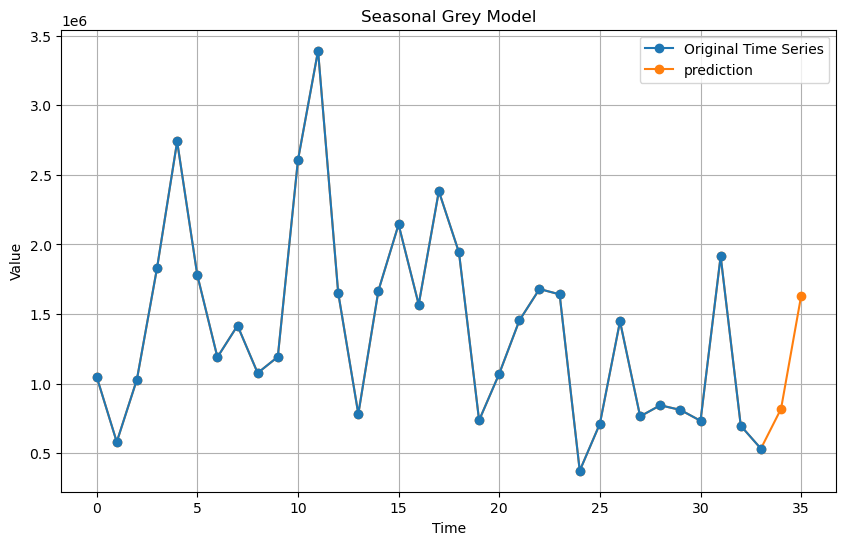

In [40]:
print(np.mean(competitor1))
print(competitor1.shape)
competitor1_extend = run_grey_model(competitor1, forecasting_step=2, period=12,testing=False)
competitor2_extend = run_grey_model(competitor2, forecasting_step=2, period=12,testing=False)

---------------------------------------------------
Root Mean Squared Error : 118.20324958907443
Mean Absolute Error : 109.31917199115121
Mean Absolute Percentage Error : 18.123735150827873%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 11.831704055305604
Mean Absolute Error : 10.882480780059085
Mean Absolute Percentage Error : 17.516603468839186%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 4587096.626974026
Mean Absolute Error : 3824300.813505275
Mean Absolute Percentage Error : 76.85392586118546%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 3623740.697429734
Mean Absolute Error : 2516347.378550252
Mean Absolute Percentage Error : 90.1754458875492%
---------------------------------------------------



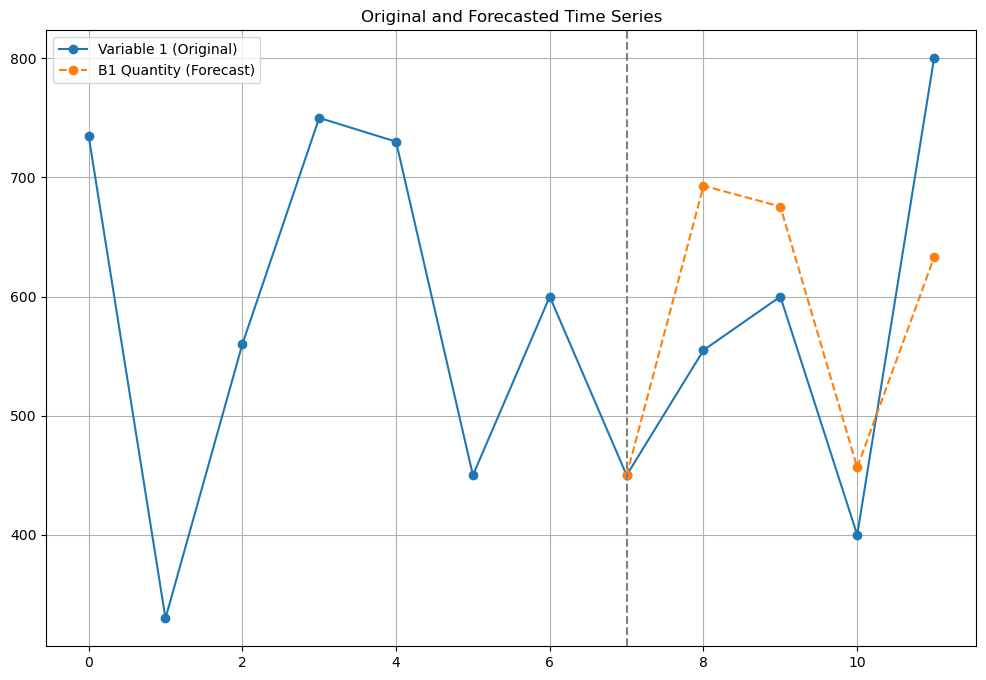

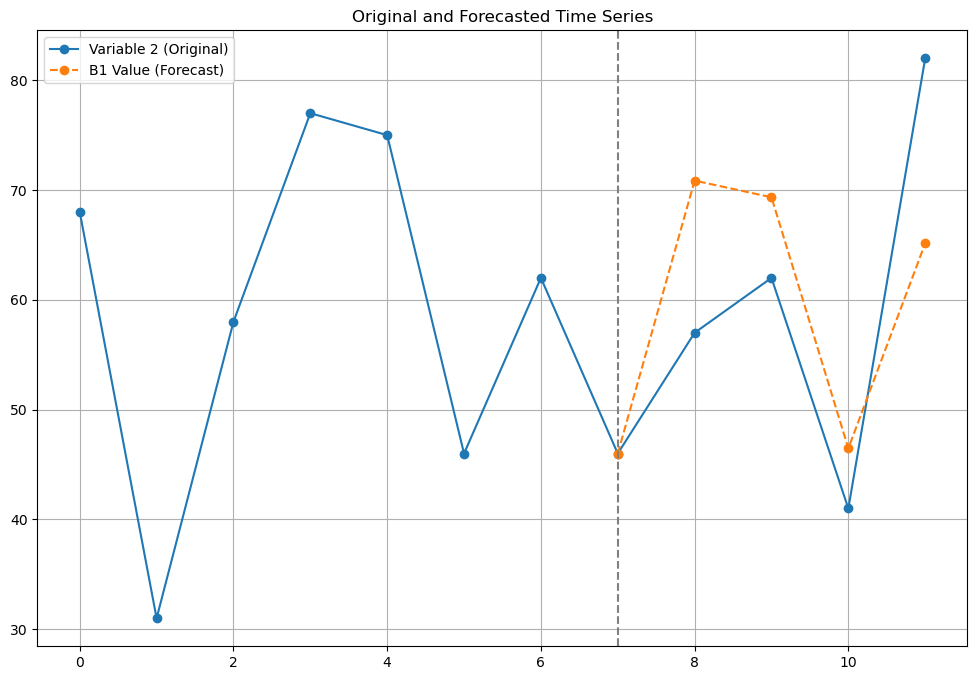

---------------------------------------------------
Root Mean Squared Error : 152.13806814570748
Mean Absolute Error : 140.3665336821626
Mean Absolute Percentage Error : 24.579271134921722%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 15.753623179837502
Mean Absolute Error : 14.535705268115489
Mean Absolute Percentage Error : 24.81369370605158%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 2551443.6471072366
Mean Absolute Error : 1742096.1284856237
Mean Absolute Percentage Error : 38.55420099749094%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 1690118.4220237099
Mean Absolute Error : 1512471.4914306847
Mean Absolute Percentage Error : 55.59640072085759%
---------------------------------------------------



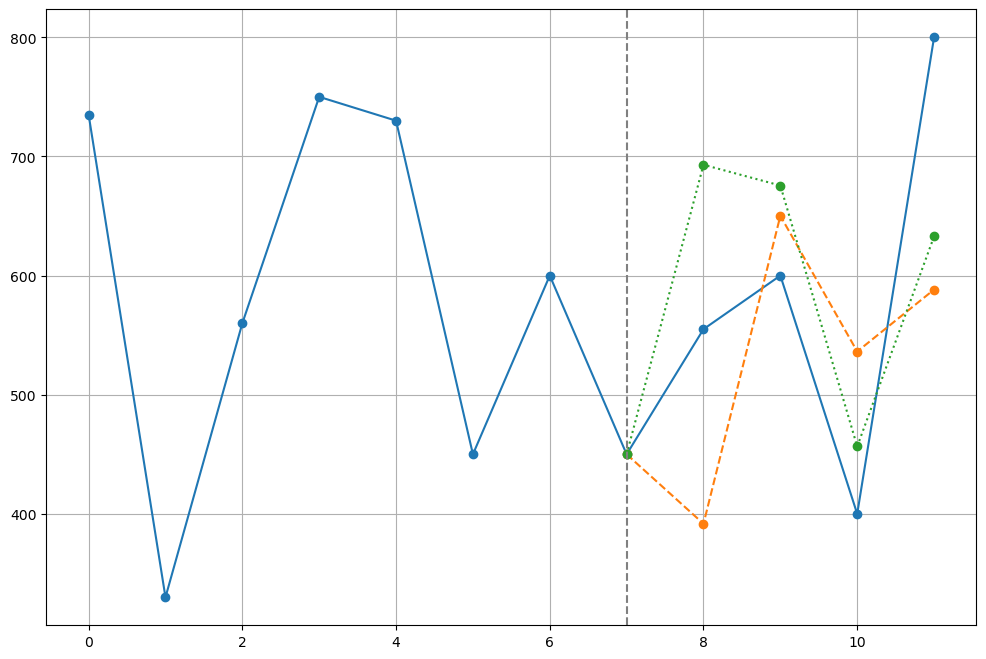

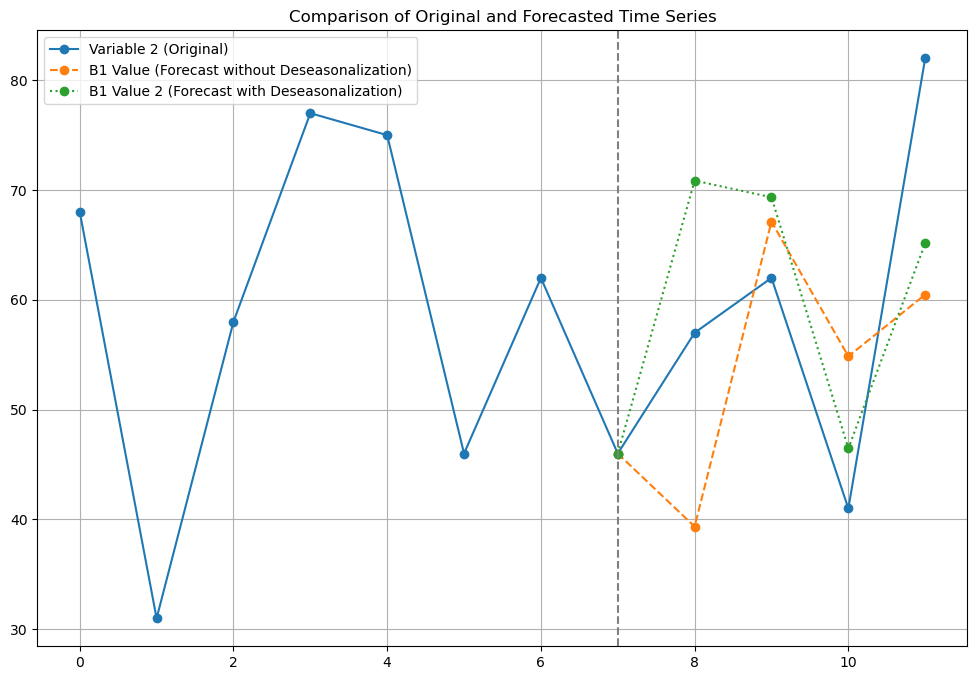

In [41]:
competitor_quater1_extend = np.array([sum(competitor1_extend[i*3:i*3+3]) for i in range(12)])
competitor_quater2_extend = np.array([sum(competitor2_extend[i*3:i*3+3]) for i in range(12)])
forecast_var(series1, series2, competitor_quater1_extend, competitor_quater2_extend,  forecast_steps=4,Maxflag=1,Period=5)


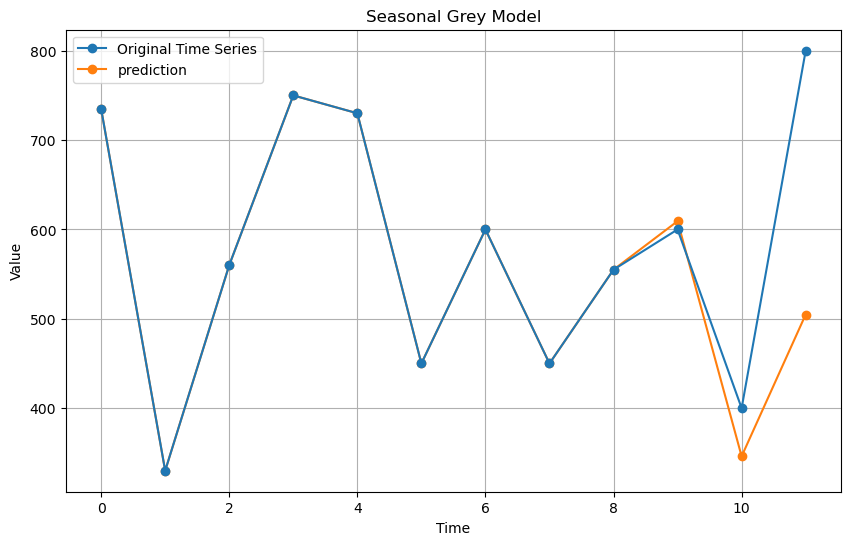

Grey Model Result
---------------------------------------------------
Root Mean Squared Error : 173.34616933182502
Mean Absolute Error : 119.4693137146503
Mean Absolute Percentage Error : 17.30861056196387%
---------------------------------------------------



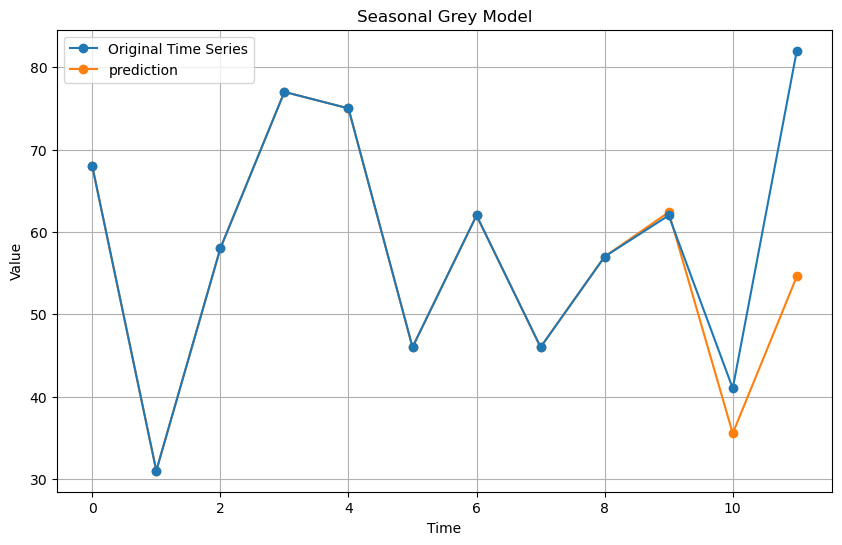

Grey Model Result
---------------------------------------------------
Root Mean Squared Error : 16.134380994992956
Mean Absolute Error : 11.089170129874502
Mean Absolute Percentage Error : 15.798815111578971%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 147.24249702571163
Mean Absolute Error : 99.51353102756131
Mean Absolute Percentage Error : 13.669442004178025%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 13.865919143142879
Mean Absolute Error : 9.316462306605944
Mean Absolute Percentage Error : 12.522062236809187%
---------------------------------------------------



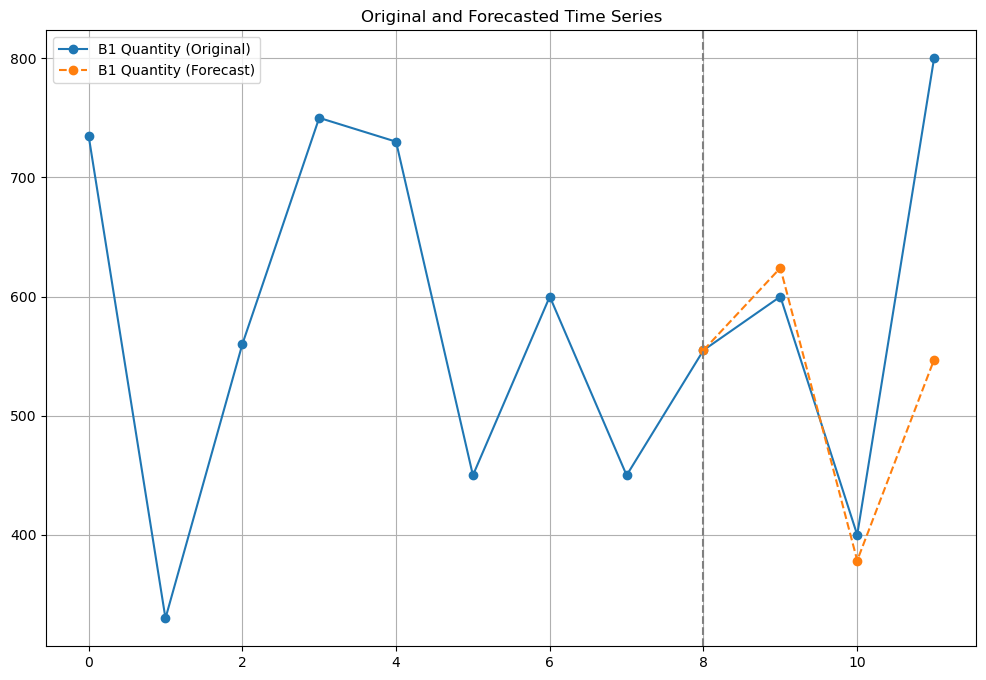

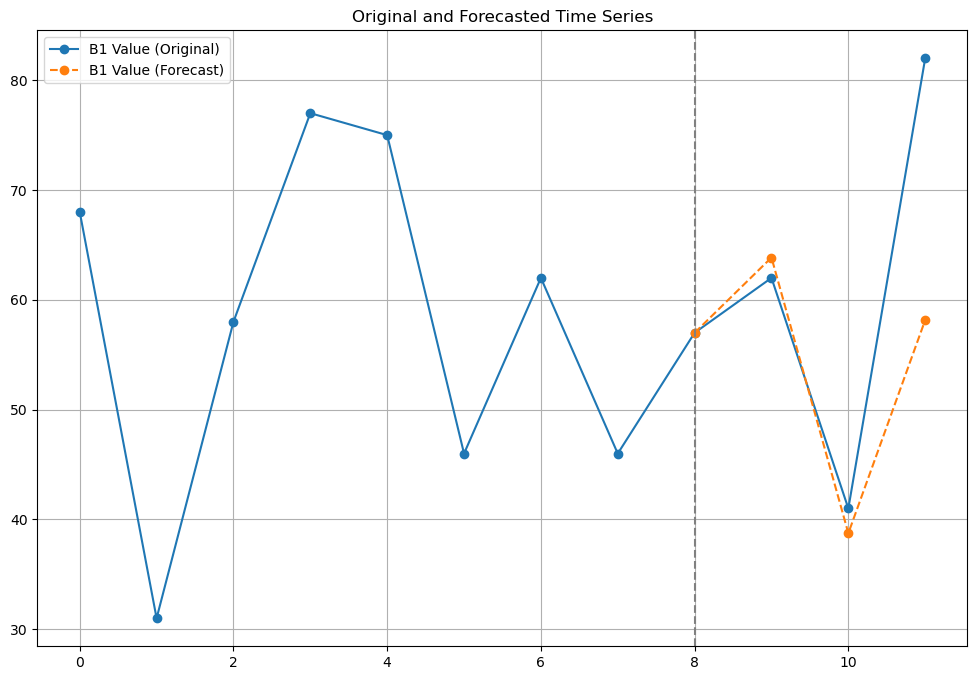

In [28]:
def combine_model(var_series1, var_series2, var_series3, var_series4, forecast_steps=4,Maxflag=1,Period=3, grey_weight = 0.5):
    var1 = var_series1.flatten()# / np.max(var_series1)
    var2 = var_series2.flatten()# / np.max(var_series2)
    var3 = var_series3.flatten()# / np.max(var_series3)
    var4 = var_series4.flatten()# / np.max(var_series4)
    t = np.arange(0, len(var_series4), 1)
    grey1_predicts = run_grey_model(var1, forecasting_step=forecast_steps, period=4)
    grey2_predicts = run_grey_model(var2, forecasting_step=forecast_steps, period=4)
    #grey3_predicts = run_grey_model(var3, forecasting_step=forecast_steps, period=4, draw=False)
    #grey4_predicts = run_grey_model(var4, forecasting_step=forecast_steps, period=4, draw=False)
    
    # Step 1: Decompose the time series into trend, seasonal, and residual components
    res_var1 = sm.tsa.seasonal_decompose(var1, period=Period)
    res_var2 = sm.tsa.seasonal_decompose(var2, period=Period)
    res_var3 = sm.tsa.seasonal_decompose(var3, period=Period)
    res_var4 = sm.tsa.seasonal_decompose(var4, period=Period)

    # Deseasonalized data
    deseasonalized_var1 = var1 - res_var1.seasonal
    deseasonalized_var2 = var2 - res_var2.seasonal
    deseasonalized_var3 = var3 - res_var3.seasonal
    deseasonalized_var4 = var4 - res_var4.seasonal

    # Combine deseasonalized variables into a 2D array
    data_deseasonalized = np.column_stack((deseasonalized_var1, deseasonalized_var2, deseasonalized_var3, deseasonalized_var4))

    # Step 2: Apply VAR to the deseasonalized data
    model = sm.tsa.VAR(data_deseasonalized)
    results = model.fit(maxlags=Maxflag)  # Adjust maxlags as needed

    # Step 3: Forecast using VAR model
#     forecast_steps = 4
    forecast_deseasonalized = results.forecast(data_deseasonalized[-results.k_ar:], steps=forecast_steps)

    # Step 4: Add seasonality back to the forecast
    forecast_var1 = (1-grey_weight)*(forecast_deseasonalized[:, 0] + res_var1.seasonal[-forecast_steps:]).flatten() + grey_weight*grey1_predicts[-forecast_steps:]
    forecast_var2 = (1-grey_weight)*(forecast_deseasonalized[:, 1] + res_var2.seasonal[-forecast_steps:]).flatten() + grey_weight*grey2_predicts[-forecast_steps:]
    #forecast_var3 = (1-grey_weight)*(forecast_deseasonalized[:, 2] + res_var3.seasonal[-forecast_steps:]).flatten() + grey_weight*grey3_predicts[-forecast_steps:]
    #forecast_var4 = (1-grey_weight)*(forecast_deseasonalized[:, 3] + res_var4.seasonal[-forecast_steps:]).flatten() + grey_weight*grey4_predicts[-forecast_steps:]

    print_metrics(var1[-forecast_steps:], forecast_var1)
    print_metrics(var2[-forecast_steps:], forecast_var2)
    #print_metrics(var3[-forecast_steps:], forecast_var3)
    #print_metrics(var4[-forecast_steps:], forecast_var4)

    # Plot the original and forecasted time series for all variables
    plt.figure(figsize=(12, 8))
    plt.plot(t, var1, label='B1 Quantity (Original)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var1[-forecast_steps-1], forecast_var1), label='B1 Quantity (Forecast)', linestyle='dashed',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.title('Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(12, 8))
    plt.plot(t, var2, label='B1 Value (Original)',marker='o')
    #plt.plot(t, var3, label='Variable 3 (Original)')
    #plt.plot(t, var4, label='Variable 4 (Original)')
    plt.plot(t[-forecast_steps-1:], np.append(var2[-forecast_steps-1], forecast_var2), label='B1 Value (Forecast)', linestyle='dashed',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var3[-forecast_steps-1], forecast_var3), label='Variable 3 (Forecast)', linestyle='dashed',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var4[-forecast_steps-1], forecast_var4), label='Variable 4 (Forecast)', linestyle='dashed',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.title('Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

combine_model(series1, series2, competitor_quater1_extend, competitor_quater2_extend,  forecast_steps=3,Maxflag=1,Period=5, grey_weight=0.7)


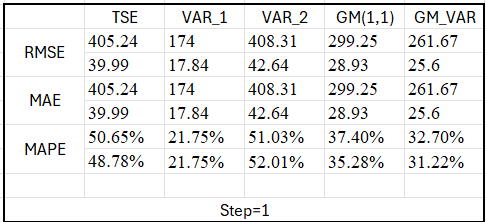
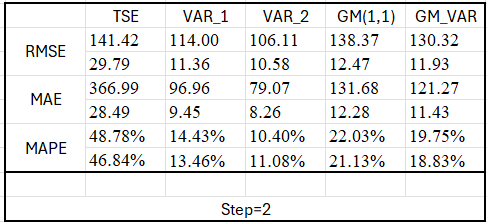

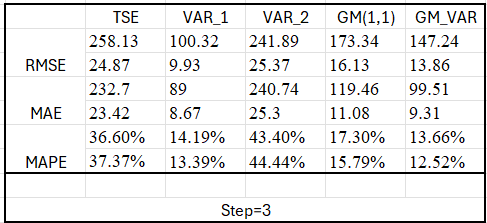
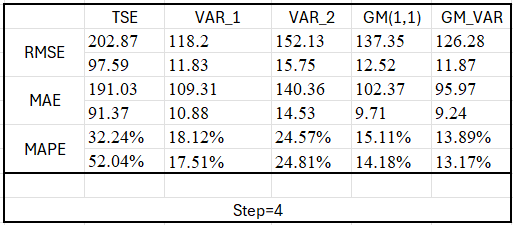

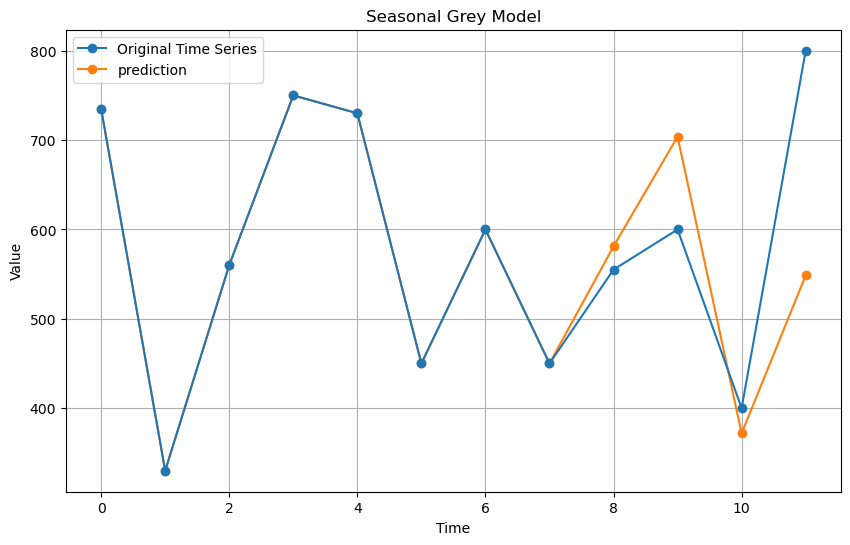

Grey Model Result
---------------------------------------------------
Root Mean Squared Error : 137.35637114023865
Mean Absolute Error : 102.376147528379
Mean Absolute Percentage Error : 15.119513102771453%
---------------------------------------------------



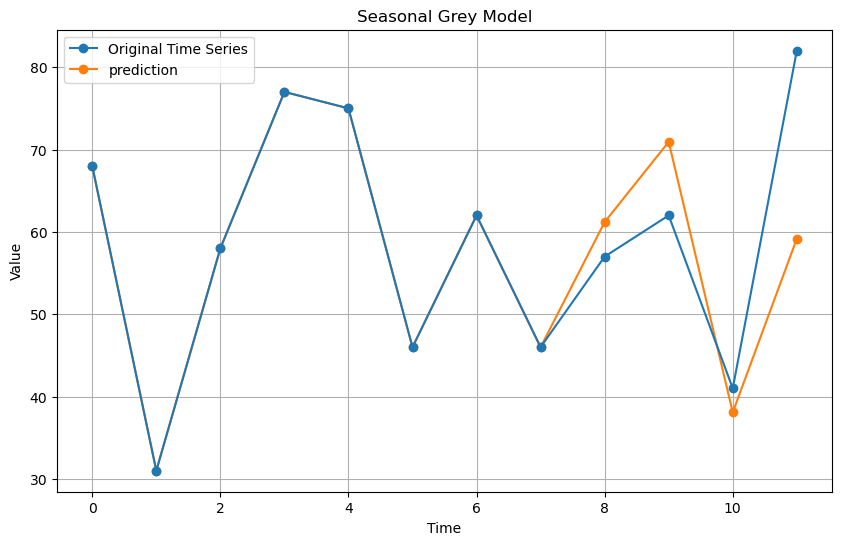

Grey Model Result
---------------------------------------------------
Root Mean Squared Error : 12.52009225153062
Mean Absolute Error : 9.719049412309825
Mean Absolute Percentage Error : 14.181881142544473%
---------------------------------------------------

[735.         330.         560.         750.         730.
 450.         600.         450.         555.         600.
 400.         800.         614.6369441  695.33643717 397.21962486
 573.86086233]


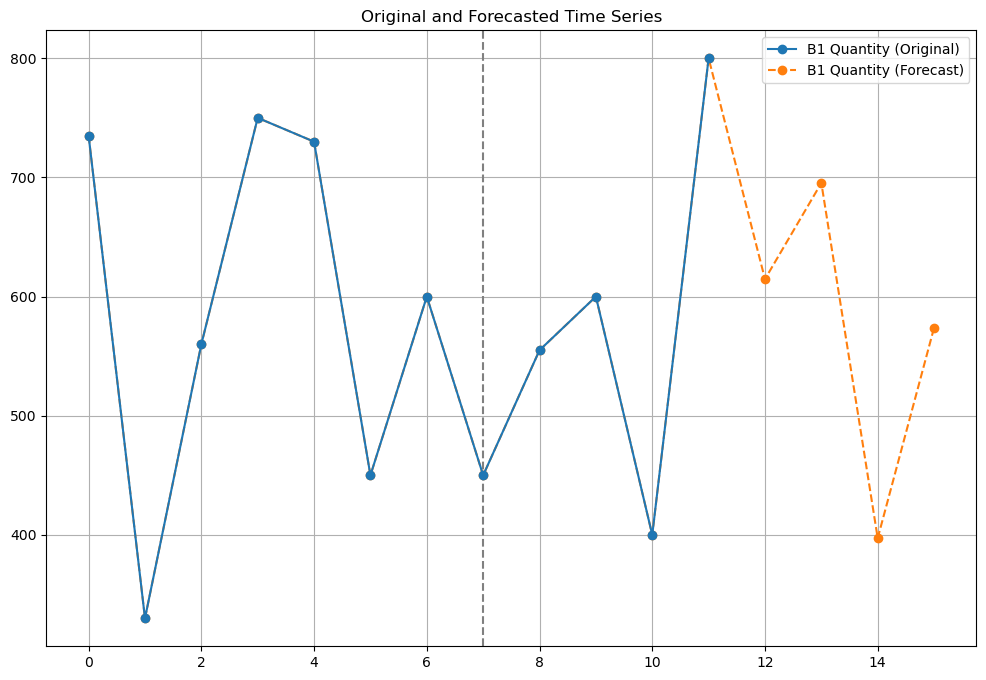

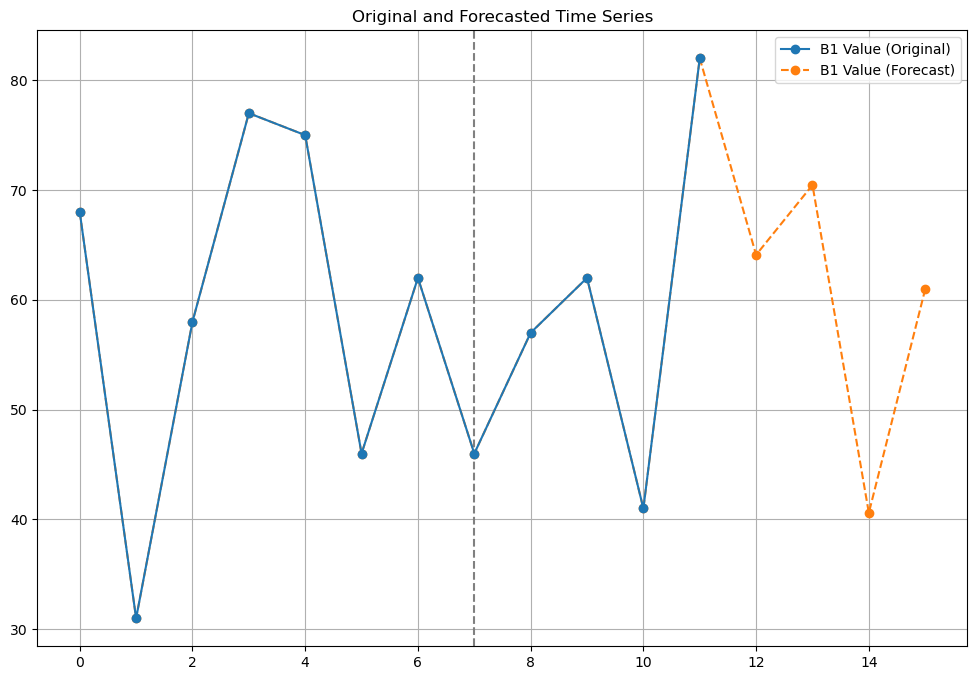

In [31]:
def combine_model(var_series1, var_series2, var_series3, var_series4, forecast_steps=4,Maxflag=1,Period=3, grey_weight = 0.5):
    var1 = var_series1.flatten()# / np.max(var_series1)
    var2 = var_series2.flatten()# / np.max(var_series2)
    var3 = var_series3.flatten()# / np.max(var_series3)
    var4 = var_series4.flatten()# / np.max(var_series4)
    t = np.arange(0, len(var_series4), 1)
    grey1_predicts = run_grey_model(var1, forecasting_step=forecast_steps, period=4)
    grey2_predicts = run_grey_model(var2, forecasting_step=forecast_steps, period=4)
    #grey3_predicts = run_grey_model(var3, forecasting_step=forecast_steps, period=4, draw=False)
    #grey4_predicts = run_grey_model(var4, forecasting_step=forecast_steps, period=4, draw=False)
    
    # Step 1: Decompose the time series into trend, seasonal, and residual components
    res_var1 = sm.tsa.seasonal_decompose(var1, period=Period)
    res_var2 = sm.tsa.seasonal_decompose(var2, period=Period)
    res_var3 = sm.tsa.seasonal_decompose(var3, period=Period)
    res_var4 = sm.tsa.seasonal_decompose(var4, period=Period)

    # Deseasonalized data
    deseasonalized_var1 = var1 - res_var1.seasonal
    deseasonalized_var2 = var2 - res_var2.seasonal
    deseasonalized_var3 = var3 - res_var3.seasonal
    deseasonalized_var4 = var4 - res_var4.seasonal

    # Combine deseasonalized variables into a 2D array
    data_deseasonalized = np.column_stack((deseasonalized_var1, deseasonalized_var2, deseasonalized_var3, deseasonalized_var4))

    # Step 2: Apply VAR to the deseasonalized data
    model = sm.tsa.VAR(data_deseasonalized)
    results = model.fit(maxlags=Maxflag)  # Adjust maxlags as needed

    # Step 3: Forecast using VAR model
#     forecast_steps = 4
    forecast_deseasonalized = results.forecast(data_deseasonalized[:], steps=forecast_steps)
    #print(forecast_deseasonalized)
    #print("and",forecast_deseasonalized[:, 0]++ res_var1.seasonal[-forecast_steps:])
    # Step 4: Add seasonality back to the forecast
    forecast_var1 = (1-grey_weight)*(forecast_deseasonalized[:, 0] + res_var1.seasonal[-forecast_steps:]).flatten() + grey_weight*grey1_predicts[-forecast_steps:]
    forecast_var2 = (1-grey_weight)*(forecast_deseasonalized[:, 1] + res_var2.seasonal[-forecast_steps:]).flatten() + grey_weight*grey2_predicts[-forecast_steps:]
    #forecast_var3 = (1-grey_weight)*(forecast_deseasonalized[:, 2] + res_var3.seasonal[-forecast_steps:]).flatten() + grey_weight*grey3_predicts[-forecast_steps:]
    #forecast_var4 = (1-grey_weight)*(forecast_deseasonalized[:, 3] + res_var4.seasonal[-forecast_steps:]).flatten() + grey_weight*grey4_predicts[-forecast_steps:]

    #print_metrics(var1[-forecast_steps:], forecast_var1)
    #print_metrics(var2[-forecast_steps:], forecast_var2)
    #print_metrics(var3[-forecast_steps:], forecast_var3)
    #print_metrics(var4[-forecast_steps:], forecast_var4)
    print(np.append(var1, forecast_var1.flatten()))
    # Plot the original and forecasted time series for all variables
    plt.figure(figsize=(12, 8))
    plt.plot(t, var1, label='B1 Quantity (Original)',marker='o',zorder = 3)
    plt.plot( np.append(var1, forecast_var1.flatten()), label='B1 Quantity (Forecast)', linestyle='dashed',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.title('Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(12, 8))
    plt.plot(t, var2, label='B1 Value (Original)',marker='o',zorder = 3)
    #plt.plot(t, var3, label='Variable 3 (Original)')
    #plt.plot(t, var4, label='Variable 4 (Original)')
    plt.plot( np.append(var2, forecast_var2), label='B1 Value (Forecast)', linestyle='dashed',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var3[-forecast_steps-1], forecast_var3), label='Variable 3 (Forecast)', linestyle='dashed',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var4[-forecast_steps-1], forecast_var4), label='Variable 4 (Forecast)', linestyle='dashed',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.title('Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

combine_model(series1, series2, competitor_quater1_extend, competitor_quater2_extend,  forecast_steps=4,Maxflag=1,Period=5, grey_weight=0.7)
